In [16]:
import pandas as pd
import numpy as np

In [2]:
pop_april = pd.read_csv('./data/population04.csv')
pop_july = pd.read_csv('./data/population07.csv')

In [3]:
pop_april.head(5)

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200401,0,20,남성,서울,도봉구,21490
1,20200401,0,30,여성,서울,동대문구,27260
2,20200401,0,50,남성,서울,구로구,35670
3,20200401,1,30,여성,서울,강남구,52380
4,20200401,1,40,남성,서울,동대문구,28420


In [95]:
pop_july.head(5)

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200701,0,40,남성,서울,강동구,35460
1,20200701,0,40,남성,서울,구로구,37440
2,20200701,0,40,남성,서울,도봉구,25830
3,20200701,1,60,여성,서울,구로구,25460
4,20200701,2,20,여성,서울,강동구,29260


In [185]:
tb_merged_april = pop_april[['일자', '군구', '유동인구수']]
tb_merged_april = tb_merged_april[tb_merged_april['군구'] == '강남구'].reset_index(drop=True)
tb_merged_april['일자'] = tb_merged_april['일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d').day)
tb_merged_april = tb_merged_april.groupby('일자')['유동인구수'].sum()
# tb_merged_april.dtypes
tb_merged_april.head(3)

일자
1    14944020
2    14939240
3    14824170
Name: 유동인구수, dtype: int64

In [188]:
tb_merged_july = pop_july[['일자', '군구', '유동인구수']]
tb_merged_july = tb_merged_july[tb_merged_july['군구'] == '강남구']
tb_merged_july['일자'] = tb_merged_july['일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d').day)
tb_merged_july = tb_merged_july.groupby('일자')['유동인구수'].sum()
# tb_merged_july['일자'] = tb_merged_july['일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d').day)
# tb_merged_july = tb_merged_july['유동인구수']
tb_merged_july.head(2)

일자
1    15655820
2    15689100
Name: 유동인구수, dtype: int64

Text(0.5, 1.0, '4월')

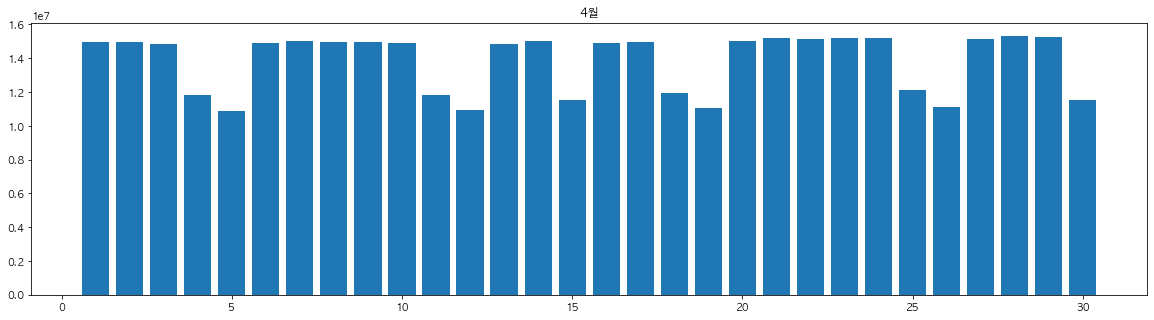

In [190]:
plt.figure(figsize=(20,5))
plt.bar(tb_merged_april.index, tb_merged_april)
plt.title('4월')

Text(0.5, 1.0, '7월')

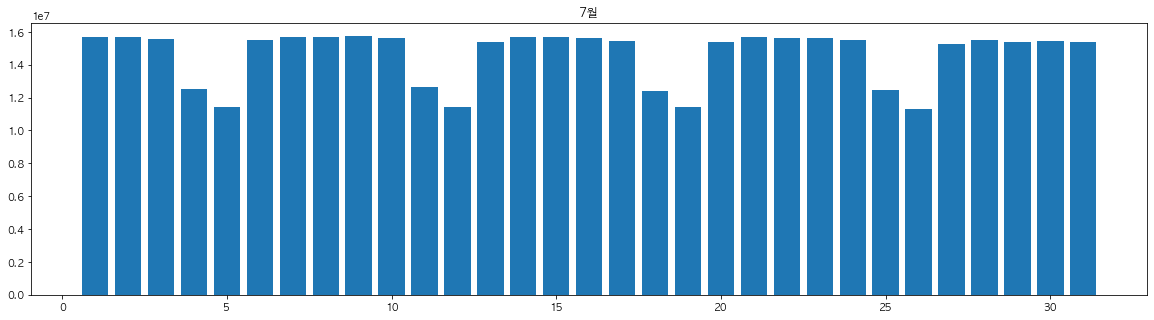

In [192]:
plt.figure(figsize=(20,5))
plt.bar(tb_merged_july.index, tb_merged_july)
plt.title('7월')

In [198]:
bars1 = list(tb_merged_april)
bars2 = list(tb_merged_july)
bars2.pop()
print(len(bars1))
print(len(bars2))

30
30


In [207]:
r1 = np.arange(len(bars2))
r2 = [x + 0.25 for x in r1]

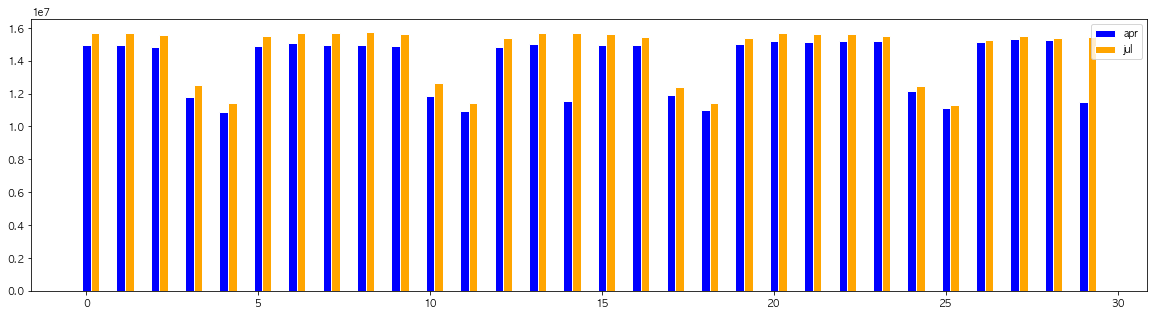

In [213]:
plt.figure(figsize=(20,5))
plt.bar(r1, bars1, color='blue', width=0.25, edgecolor='white', label='apr')
plt.bar(r2, bars2, color='orange', width=0.25, edgecolor='white', label='jul')
plt.legend()

In [186]:
# apr_jul = pd.merge(tb_merged_april, tb_merged_july, left_on="일자", right_on="일자", suffixes=["_apr", "_jul"])
# apr_jul.head

In [187]:
# plt.figure(figsize=(20,5))
# plt.bar(tb_merged_april.index, tb_merged_april)
# plt.title('4월')

In [21]:
pop_april_gu = pop_april.groupby('군구')['유동인구수'].sum()
pop_april_gu.head(5)
print(pop_april_gu)

군구
강남구     415479300
강동구     239157350
강북구     171437740
강서구     316538320
관악구     285422490
광진구     205584150
구로구     252685600
금천구     162236340
노원구     286372000
도봉구     172730720
동대문구    209673270
동작구     224537120
마포구     245660870
서대문구    182865220
서초구     293867470
성동구     184605390
성북구     243666730
송파구     372279240
양천구     235960940
영등포구    280428050
용산구     151474540
은평구     241684780
종로구     152183320
중구      152646440
중랑구     210660150
Name: 유동인구수, dtype: int64


In [6]:
import matplotlib.pyplot as plt

In [93]:
pop_april_gu = pop_april_gu.sort_values(ascending=True)
pop_april_gu.head(5)

군구
용산구    151474540
종로구    152183320
중구     152646440
금천구    162236340
강북구    171437740
Name: 유동인구수, dtype: int64

In [8]:
plt.rcParams['font.family'] = 'AppleGothic'

Text(0.5, 1.0, '구별 유동인구수')

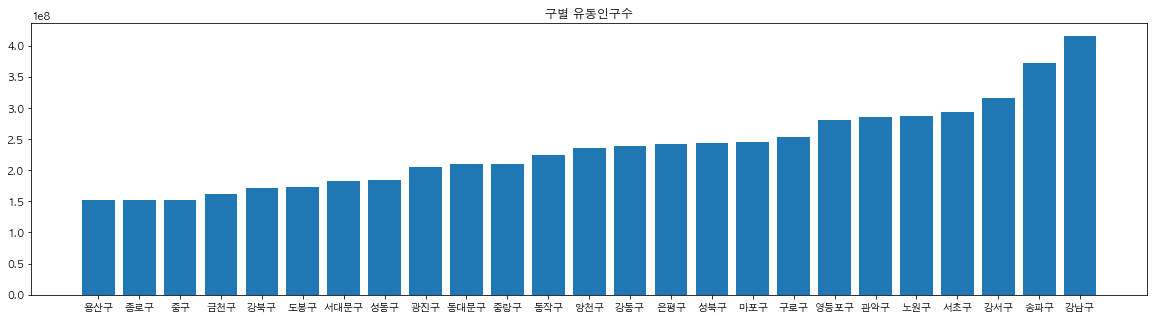

In [9]:
plt.figure(figsize=(20,5))
plt.bar(pop_april_gu.index, pop_april_gu)
plt.title('구별 유동인구수')

In [26]:
april_pop_daily = pop_april[pop_april['군구'] == '강남구'].groupby('일자')['유동인구수'].sum()
april_pop_daily.head(5)
print(list(april_pop_daily))

[14944020, 14939240, 14824170, 11799100, 10901220, 14919780, 15050390, 14969060, 14979370, 14906870, 11832630, 10950160, 14845990, 15040560, 11544040, 14926420, 14968010, 11931460, 11030320, 15018110, 15174740, 15151450, 15182040, 15171990, 12128180, 11097490, 15156750, 15322060, 15260040, 11513640]


In [11]:
july_pop_daily = pop_july[pop_july['군구'] == '강남구'].groupby('일자')['유동인구수'].sum()
july_pop_daily.head(5)


일자
20200701    15655820
20200702    15689100
20200703    15554150
20200704    12533180
20200705    11426880
Name: 유동인구수, dtype: int64

Text(0.5, 1.0, '4월 일별 유동인구')

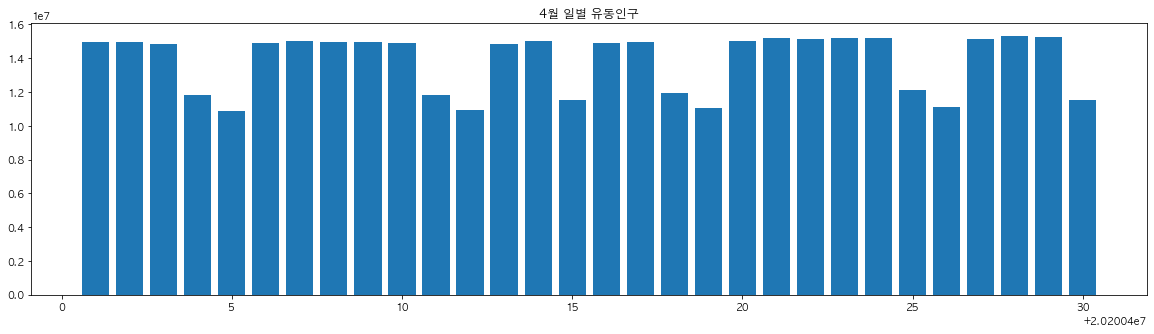

In [12]:
plt.figure(figsize=(20,5))
plt.bar(april_pop_daily.index, april_pop_daily)
plt.title('4월 일별 유동인구')

Text(0.5, 1.0, '7월 일별 유동인구')

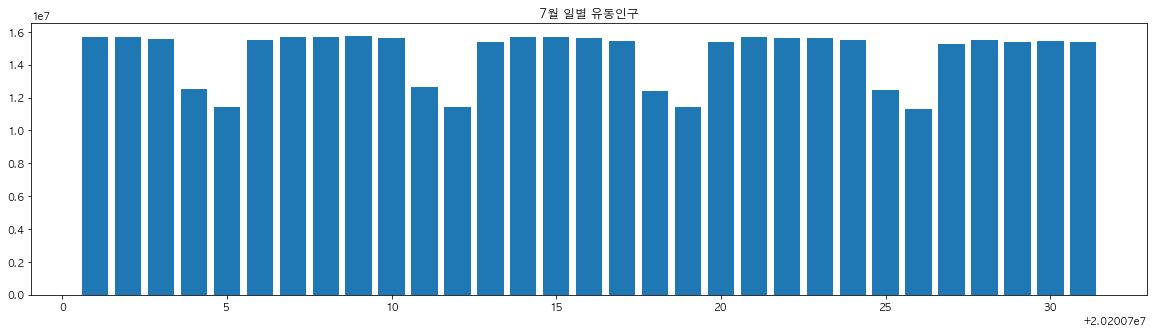

In [13]:
plt.figure(figsize=(20,5))
plt.bar(july_pop_daily.index, july_pop_daily)
plt.title('7월 일별 유동인구')

In [75]:
barwidth = 0.25

In [76]:
bars1 = list(april_pop_daily)
bars1

[14944020,
 14939240,
 14824170,
 11799100,
 10901220,
 14919780,
 15050390,
 14969060,
 14979370,
 14906870,
 11832630,
 10950160,
 14845990,
 15040560,
 11544040,
 14926420,
 14968010,
 11931460,
 11030320,
 15018110,
 15174740,
 15151450,
 15182040,
 15171990,
 12128180,
 11097490,
 15156750,
 15322060,
 15260040,
 11513640]

In [77]:
bars2 = list(july_pop_daily)
bars2.pop()

15379740

In [78]:
print(len(bars1))
print(len(bars2))

30
30


In [79]:
r1 = np.arange(len(bars1) + 1)

In [80]:
r2 = [x + 0.25 for x in r1]
print(r1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


In [81]:
print(r2)

[0.25, 1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25, 10.25, 11.25, 12.25, 13.25, 14.25, 15.25, 16.25, 17.25, 18.25, 19.25, 20.25, 21.25, 22.25, 23.25, 24.25, 25.25, 26.25, 27.25, 28.25, 29.25, 30.25]


In [83]:
# plt.bar(r1, bars1, color='#7f6d5f', width=0.25, edgecolor='white', label='var1')
# plt.bar(r2, bars2, color='#557f2d', width=0.25, edgecolor='white', label='var2')

In [84]:
april_pop_daily.head(3)

일자
20200401    14944020
20200402    14939240
20200403    14824170
Name: 유동인구수, dtype: int64

In [88]:
merged = pd.merge(april_pop_daily, july_pop_daily)

In [92]:
print(len(merged))

0
